<a href="https://colab.research.google.com/github/gkrry2723/MLclassroom_hw/blob/main/ML10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


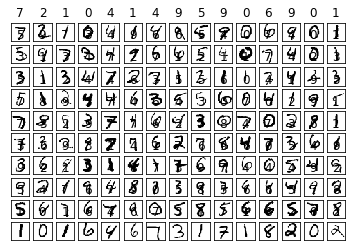

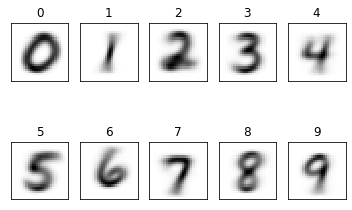

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "/gdrive/My Drive/ML_assignment/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


0 train:::acccuracy   0.099    J    13.025631307685984 ::::: test accuracy 0.10322222222222223    J    13.026376013851813


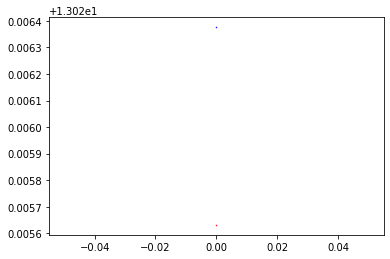

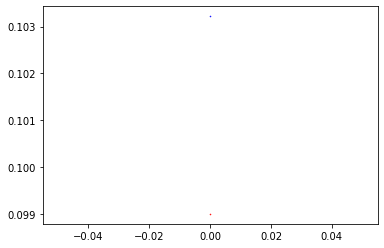

In [ ]:
import math
# 1. 세타 값 initialization
mu, sigma = 0, 0.1
u=np.random.normal(mu,sigma,(196,785))
v=np.random.normal(mu,sigma,(49,197))
w=np.random.normal(mu,sigma,(10,50))

#2. input 값 정리
train_x=list_image[:,0:1000]
train_l=list_label[0:1000]

test_x=list_image[:,1000:]
test_l=list_label[1000:]

#bias 값 추가
temp1=np.ones((1000), dtype=float)
temp2=np.ones((9000), dtype=float)

train_x=np.insert(train_x,0,temp1,axis=0)
test_x=np.insert(test_x,0,temp2,axis=0)

#plot위한 list
J_train=[]
accurate_train=[]
steps=[]

J_test=[]
accurate_test=[]

#sigmoid 함수 이후 값
y_s = np.zeros((197, 1000), dtype=float)
z_s = np.zeros((50,1000), dtype=float)
h_s = np.zeros((10, 1000), dtype=float)

y_st = np.zeros((197, 9000), dtype=float)
z_st = np.zeros((50, 9000), dtype=float)
h_st = np.zeros((10, 9000), dtype=float)

#label위한 diagonal 행렬
l=np.identity(10)

#bias 값 추가(sigmoid layer에만)
for i in range(0,9000):
  if(i<1000):
    y_s[0][i]=1
    z_s[0][i]=1
  y_st[0][i]=1
  z_st[0][i]=1
 
for c in range(0,1):
  steps.append(c)

  # 3. J 구하기
  #3-1 y랑 sigmoid y
  y=np.dot(u,train_x)
  yt=np.dot(u,test_x)
  for a in range(1,197):
    for b in range(0,9000):
      if(b<1000):
        y_s[a][b]=1/(1+math.exp(-y[a-1][b]))
      y_st[a][b]=1/(1+math.exp(-yt[a-1][b]))

  #3-2 z 랑 sigmoid z
  z=np.dot(v,y_s)
  zt=np.dot(v,y_st)
  for a in range(1,50):
    for b in range(0, 9000):
      if(b<1000):
        z_s[a][b]=1/(1+math.exp(-z[a-1][b]))
      z_st[a][b]=1/(1+math.exp(-zt[a-1][b]))

  #3-3 H랑 sigmoid h
  h=np.dot(w,z_s)
  ht=np.dot(w,z_st)
  for a in range(0,10):
    for b in range(0,9000):
      if(b<1000):
        h_s[a][b]=1/(1+math.exp(-h[a][b]))
      h_st[a][b]=1/(1+math.exp(-ht[a][b]))

  #5. gradient descent 하기, J 구하기, accurate 세기
  J_sum=0
  theta_sum=0
  p=0.5
  lambdaa=1000
  h_s_t=np.transpose(h_s)
  z_s_t=np.transpose(z_s[1:,:])
  y_s_t=np.transpose(y_s[1:,:])
  x_s_t=np.transpose(train_x[1:,:])

  w_t=w[:,1:]
  v_t=v[:,1:]
  u_t=u[:,1:]
  
  one_z=np.transpose(np.ones((49), dtype=float))
  one_y=np.transpose(np.ones((196), dtype=float))

  delta4=np.zeros((49,10), dtype=float)
  delta3=np.zeros((196,49), dtype=float)
  delta2=np.zeros((784,196), dtype=float)

  ################test
  Jt_sum=0

  result_test=np.empty((9000), dtype=int)
  true_table_test=np.empty((9000), dtype=int)
  false_table_test=np.empty((9000), dtype=int)
  
  ########################

  false_count_test=0
  count_test=0
  count=0

  for i in range(0,9000):
    if i<1000:
      result=np.argmax(h_s[:,i])
      if(result==train_l[i]):
        count=count+1
      lable=train_l[i]
      temp4= h_s_t[i]-l[lable]
      temp3=np.multiply( np.dot( np.transpose( w_t ) , temp4 ) , np.multiply(z_s_t[i] , one_z - z_s_t[i]))
      temp2=np.multiply( np.dot( np.transpose( v_t ) , temp3 ) , np.multiply(y_s_t[i] , one_y - y_s_t[i]))
      temp=temp4[np.newaxis]
      delta4=delta4 + np.dot( np.transpose(z_s_t[i][np.newaxis]), temp4[np.newaxis])
      delta3=delta3+ np.dot( np.transpose(y_s_t[i][np.newaxis]), temp3[np.newaxis] )
      delta2=delta2+ np.dot(np.transpose(x_s_t[i][np.newaxis]), temp2[np.newaxis])

      for k in range(0,10):
        J_sum=J_sum+(-l[lable][k]*math.log(h_s[k][i])-(1-l[lable][k])*math.log(1-h_s[k][i]))

    #######################test
    result_test[i]=np.argmax(h_st[:,i])
    if(result_test[i]==test_l[i]):
      true_table_test[count_test]=i
      count_test=count_test+1
    else:
      false_table_test[false_count_test]=i
      false_count_test=false_count_test+1
    lable_test=test_l[i]

    for k in range(0,10):
      Jt_sum=Jt_sum+(-l[lable_test][k]*math.log(h_st[k][i])-(1-l[lable_test][k])*math.log(1-h_st[k][i]))
    ###########################

  u2=np.multiply(u_t,u_t)
  v2=np.multiply(v_t,v_t)
  w2=np.multiply(w_t,w_t)
  theta_sum=np.sum(u2)+np.sum(v2)+np.sum(w2)

  accuracy=count/1000
  accurate_train.append(accuracy)

  delta4=delta4/1000+lambdaa*np.transpose(w_t)/(49*10+49*196+196*784)
  delta3=delta3/1000+lambdaa*np.transpose(v_t)/(49*10+49*196+196*784)
  delta2=delta2/1000+lambdaa*np.transpose(u_t)/(49*10+49*196+196*784)

  J_sum=J_sum/1000+lambdaa*theta_sum/(2*(49*10+49*196+196*784))
  J_train.append(J_sum)

  ####################test
  accuracy_test=count_test/9000
  accurate_test.append(accuracy_test)

  Jt_sum=Jt_sum/9000+lambdaa*theta_sum/(2*(49*10+49*196+196*784))
  J_test.append(Jt_sum)
  ######################

  for a in range(0,196):
    for b in range(1,785):
      if a<10 and b<50:
        w[a][b]=w[a][b]-p*(np.transpose(delta4)[a][b-1])
      if a<49 and b<197:
        v[a][b]=v[a][b]-p*np.transpose(delta3)[a][b-1]
      u[a][b]=u[a][b]-p*np.transpose(delta2)[a][b-1]

  print(c,"train:::acccuracy  ",accuracy,"   J   ",J_sum,"::::: test accuracy",accuracy_test,"   J   ",Jt_sum)


f1 = plt.figure(1)
plt.scatter(steps,J_train,c="red",s=0.3)
plt.scatter(steps,J_test,c="blue",s=0.3)

f2 = plt.figure(2)
plt.scatter(steps,accurate_train,c="red",s=0.3)
plt.scatter(steps,accurate_test,c="blue",s=0.3)


  ***************정답 1page//20184754 김현주***************  

 1. Plot the loss curve 


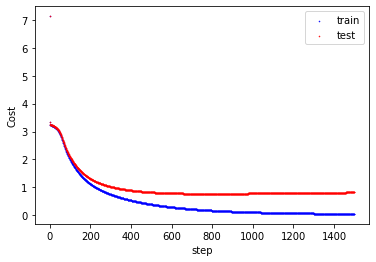

 2.  Plot the accuracy curve 


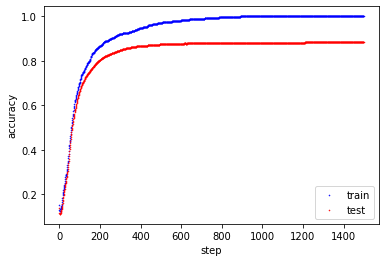

 3.  Plot the accuracy value 
 train data's final accuracy:  100.0  %
 test data's final accuracy:  88.3111111111111  % 
 4.  Plot the classification example 
    1) 10 correctly classified testing images


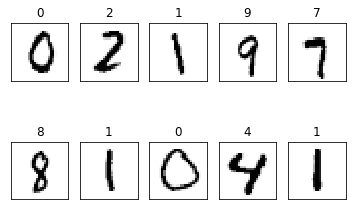

    2) 10 misclassified testing images


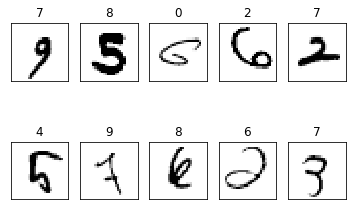

In [ ]:
# 답 쓰는 곳
print("\033[1m","\033[31m","***************정답 1page//20184754 김현주***************","\033[0m","\n")
print("\033[1m","1. Plot the loss curve","\033[0m")
f1 = plt.figure(1)
plt.scatter(steps,J_train,c="blue",s=0.3,label='train')
plt.scatter(steps,J_test,c="red",s=0.3,label='test')

plt.xlabel('step')
plt.ylabel('Cost')

plt.legend(loc='upper right')

plt.show() 

print("\033[1m","2.  Plot the accuracy curve","\033[0m")
f2 = plt.figure(2)
plt.scatter(steps,accurate_train,c="blue",s=0.3,label='train')
plt.scatter(steps,accurate_test,c="red",s=0.3,label='test')

plt.xlabel('step')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

plt.show() 
print("\033[1m","3.  Plot the accuracy value","\033[0m")
print("\033[31m","train data's final accuracy: " , accurate_train[len(accurate_train)-1]*100," %")
print("\033[34m","test data's final accuracy: ", accurate_test[len(accurate_test)-1]*100," %","\033[0m")

print("\033[1m","4.  Plot the classification example","\033[0m")
print("    1) 10 correctly classified testing images")
f3 = plt.figure(3)
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title(result_test[true_table_test[i]])
  plt.imshow(test_x[1:,true_table_test[i]].reshape((size_row, size_col)), cmap='Greys', interpolation='None')
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
plt.show() 

print("    2) 10 misclassified testing images")
f4 = plt.figure(4)
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title(result_test[false_table_test[i]])
  plt.imshow(test_x[1:,false_table_test[i]].reshape((size_row, size_col)), cmap='Greys', interpolation='None')
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()
